# Regresja

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [52]:
%%capture --no-display
boston = datasets.load_boston()
# print description
print(boston.DESCR)

In [53]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [109]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [110]:
X=boston_X_train
y=boston_y_train

In [111]:
X_test=boston_X_test
y_test=boston_y_test

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5)#, random_state=seed)


In [123]:
%%capture --no-display
X=boston_X_train
y=boston_y_train
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    #'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    #'elasticnet__alpha': [0.01+0.02*i for i in range(0,11)]},
                    'elasticnet__alpha': [0.1, 0.2, 0.25, 0.3, 0.35]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

{'elasticnet__alpha': 0.3, 'polynomialfeatures__degree': 1}

In [124]:
metrics.r2_score(y_test, grid_1.best_estimator_.predict(X_test))

0.2714118969994197

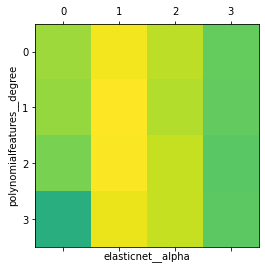

In [59]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [127]:
%%capture --no-display
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.25, 0.3, 0.35, 0.4]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X, y)
grid_2.best_params_

{'lasso__alpha': 0.35, 'polynomialfeatures__degree': 1}

In [128]:
metrics.r2_score(y_test, grid_2.best_estimator_.predict(X_test))

0.34742080353447

In [137]:
%%capture --no-display
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    #'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]},
                    'ridge__alpha': [200 - 2*10*i for i in range(6)] + [200 + 2*10*i for i in range(1, 6)]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X, y)
grid_3.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 180}

In [138]:
metrics.r2_score(y_test, grid_3.best_estimator_.predict(X_test))

0.2431373877709483

In [118]:
%%capture --no-display
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
grid_4.best_params_

{'polynomialfeatures__degree': 1}

In [119]:
from sklearn import metrics 
metrics.r2_score(y_test, grid_4.best_estimator_.predict(X_test))

0.41894349864428937

In [120]:
from sklearn import metrics 
metrics.r2_score(y, grid_4.best_estimator_.predict(X))

0.74211902708109

In [64]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: -1.2894183199282097
Explained variance score: -1.2715409278403187
Median absolute error: 3.515183060025759
Mean squared error: 43.18506882697383
Mean absolute errors: 4.8297850926686
Lasso
R^2: -1.3405620930677768
Explained variance score: -1.3336502428326416
Median absolute error: 3.6534388293894757
Mean squared error: 44.14978870532818
Mean absolute errors: 4.883117498278234
Ridge
R^2: -3.14414103254804
Explained variance score: -2.805384152002322
Median absolute error: 2.7263198678979563
Mean squared error: 78.17051788285043
Mean absolute errors: 5.411660540242947
LR
R^2: -3.841594041936906
Explained variance score: -2.783637136362273
Median absolute error: 3.3125733971595768
Mean squared error: 91.32650425365168
Mean absolute errors: 6.162484204292298


In [65]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet', 'Lasso','Ridge','LR'])#,'Lasso','Ridge','LR'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,-1.289418,-1.271541,3.515183,43.185069,4.829785
1,Lasso,-1.340562,-1.333650,3.653439,44.149789,4.883117
2,Ridge,-3.144141,-2.805384,2.726320,78.170518,5.411661
3,LR,-3.841594,-2.783637,3.312573,91.326504,6.162484
